# First Data Science Project
## Melbourne Housing Prices Prediction
Here, we will go through a data challenge using data predicting housing prices in Melbourne, Australia. 

The data is from Kaggle and can be found [here](https://www.kaggle.com/anthonypino/melbourne-housing-market)

In [617]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

## 1. Collection

In [618]:
full_data = pd.read_csv("./data/Melbourne_housing_FULL.csv")

In [619]:
full_data.shape

(34857, 21)

In [620]:
full_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [621]:
full_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [622]:
full_data.Type.value_counts()
# Type:
# br - bedroom(s);
# h - house,cottage,villa, semi,terrace;
# u - unit, duplex;
# t - townhouse;
# dev site - development site;
# o res - other residential.

h    23980
u     7297
t     3580
Name: Type, dtype: int64

In [623]:
full_data.Rooms.value_counts()

3     15084
2      8332
4      7956
5      1737
1      1479
6       204
7        32
8        19
10        6
9         4
12        3
16        1
Name: Rooms, dtype: int64

In [624]:
full_data.Postcode.value_counts()

3073.0    844
3046.0    638
3020.0    617
3121.0    612
3165.0    583
         ... 
3428.0      1
3770.0      1
3786.0      1
3139.0      1
3159.0      1
Name: Postcode, Length: 211, dtype: int64

In [625]:
full_data.Car.value_counts()

2.0     12214
1.0      9164
0.0      1631
3.0      1606
4.0      1161
5.0       151
6.0       140
7.0        25
8.0        23
10.0        6
9.0         3
11.0        2
26.0        1
18.0        1
12.0        1
Name: Car, dtype: int64

In [626]:
full_data.YearBuilt.value_counts()

### Year 2106 needs to be corrected

1970.0    1490
1960.0    1260
1950.0    1089
1980.0     726
1900.0     606
          ... 
1830.0       1
2106.0       1
1897.0       1
1876.0       1
1879.0       1
Name: YearBuilt, Length: 160, dtype: int64

In [627]:
# Applying the condition
full_data.loc[full_data["YearBuilt"] == 2106, "YearBuilt"] = 2006

In [628]:
full_data.Regionname.value_counts()

Southern Metropolitan         11836
Northern Metropolitan          9557
Western Metropolitan           6799
Eastern Metropolitan           4377
South-Eastern Metropolitan     1739
Eastern Victoria                228
Northern Victoria               203
Western Victoria                115
Name: Regionname, dtype: int64

In [629]:
full_data.Propertycount.value_counts()

21650.0    844
8870.0     722
10969.0    583
14949.0    552
10412.0    491
          ... 
129.0        1
1588.0       1
5462.0       1
1160.0       1
342.0        1
Name: Propertycount, Length: 342, dtype: int64

In [630]:
#SellerG: Real Estate Agent
full_data.SellerG.value_counts()

Jellis             3359
Nelson             3236
Barry              3235
hockingstuart      2623
Marshall           2027
                   ... 
Clairmont             1
Buxton/Find           1
Harcourts/Barry       1
Silver                1
Methven               1
Name: SellerG, Length: 388, dtype: int64

In [631]:
full_data.Method.value_counts()
# Method:
# S - property sold;
# SP - property sold prior;
# PI - property passed in;
# PN - sold prior not disclosed;
# SN - sold not disclosed;
# NB - no bid;
# VB - vendor bid;
# W - withdrawn prior to auction;
# SA - sold after auction;
# SS - sold after auction price not disclosed.
# N/A - price or highest bid not available.

S     19744
SP     5095
PI     4850
VB     3108
SN     1317
PN      308
SA      226
W       173
SS       36
Name: Method, dtype: int64

## 2. Cleaning

#### Removing the duplicates

In [632]:
full_data = full_data[~full_data.duplicated()]

#### Checking missing values

In [633]:
for col in full_data.columns:
    print(col, sum(full_data.loc[:, col].isnull()))

Suburb 0
Address 0
Rooms 0
Type 0
Price 7609
Method 0
SellerG 0
Date 0
Distance 1
Postcode 1
Bedroom2 8217
Bathroom 8226
Car 8728
Landsize 11810
BuildingArea 21115
YearBuilt 19306
CouncilArea 3
Lattitude 7976
Longtitude 7976
Regionname 3
Propertycount 3


#### Rows with missing price values are removed

In [634]:
dd

In [635]:
#missing values
for col in data.columns:
    print(col, sum(data.loc[:, col].isnull()))

Suburb 0
Address 0
Rooms 0
Type 0
Price 0
Method 0
SellerG 0
Date 0
Distance 0
Postcode 0
Bedroom2 0
Bathroom 0
Car 0
Landsize 0
BuildingArea 0
YearBuilt 0
CouncilArea 0
Lattitude 8
Longtitude 8
Regionname 0
Propertycount 0


#### Encoding

In [636]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

In [637]:
le = LabelEncoder()  #instantiate the Label Encoder
data['Type'] = le.fit_transform(data['Type'])

C:\Users\DAnand\AppData\Local\Temp\ipykernel_15776\3139637655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Type'] = le.fit_transform(data['Type'])


In [638]:
le = LabelEncoder()  #instantiate the Label Encoder
data['Method'] = le.fit_transform(data['Method'])

C:\Users\DAnand\AppData\Local\Temp\ipykernel_15776\3280429073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Method'] = le.fit_transform(data['Method'])


In [639]:
#Council Area
le = LabelEncoder()  #instantiate the Label Encoder
data['CouncilArea'] = le.fit_transform(data['CouncilArea'])

# Regionname
le = LabelEncoder()  #instantiate the Label Encoder
data['Regionname'] = le.fit_transform(data['Regionname'])

#Suburb
le = LabelEncoder()  #instantiate the Label Encoder
data['Suburb'] = le.fit_transform(data['Suburb'])

le = LabelEncoder()  #instantiate the Label Encoder
data['Postcode'] =  le.fit_transform(data['Postcode'])

#SellerG
le = LabelEncoder()  #instantiate the Label Encoder
data['SellerG'] =  le.fit_transform(data['SellerG'])


C:\Users\DAnand\AppData\Local\Temp\ipykernel_15776\1043177765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CouncilArea'] = le.fit_transform(data['CouncilArea'])
C:\Users\DAnand\AppData\Local\Temp\ipykernel_15776\1043177765.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regionname'] = le.fit_transform(data['Regionname'])
C:\Users\DAnand\AppData\Local\Temp\ipykernel_15776\1043177765.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [640]:
#mean encode
def mean_encode(data, col, on):
    group = data.groupby(col).mean()
    mapper = {k: v for k, v in zip(group.index, group.loc[:, on].values)}

    data.loc[:, col] = data.loc[:, col].replace(mapper)
    data.loc[:, col].fillna(value=np.mean(data.loc[:, col]), inplace=True)

    return data

In [641]:
# data = mean_encode(data, col='SellerG', on='Price')

In [642]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,0,25 Bloomburg St,2,0,1035000.0,1,22,4/02/2016,2.5,52,...,1.0,0.0,156.0,79.0,1900.0,31,-37.8079,144.9934,2,4019.0
4,0,5 Charles St,3,0,1465000.0,3,22,4/03/2017,2.5,52,...,2.0,0.0,134.0,150.0,1900.0,31,-37.8093,144.9944,2,4019.0
6,0,55a Park St,4,0,1600000.0,4,147,4/06/2016,2.5,52,...,1.0,2.0,120.0,142.0,2014.0,31,-37.8072,144.9941,2,4019.0
11,0,124 Yarra St,3,0,1876000.0,1,147,7/05/2016,2.5,52,...,2.0,0.0,245.0,210.0,1910.0,31,-37.8024,144.9993,2,4019.0
14,0,98 Charles St,2,0,1636000.0,1,147,8/10/2016,2.5,52,...,1.0,2.0,256.0,107.0,1890.0,31,-37.8060,144.9954,2,4019.0


In [643]:
# convert the 'Date' column to datetime format
data['Date']= pd.to_datetime(data['Date'])

c:\Users\DAnand\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/10/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\DAnand\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/07/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\DAnand\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17/09/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\DAnand\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/03/2017' in DD/MM/YYYY format. Provide format or sp

In [644]:
data['sold_in_year'] = pd.DatetimeIndex(data['Date']).year
data['sold_in_month'] = pd.DatetimeIndex(data['Date']).month

C:\Users\DAnand\AppData\Local\Temp\ipykernel_15776\3342976913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sold_in_year'] = pd.DatetimeIndex(data['Date']).year
C:\Users\DAnand\AppData\Local\Temp\ipykernel_15776\3342976913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sold_in_month'] = pd.DatetimeIndex(data['Date']).month


In [645]:
# data = mean_encode(data, col='sold_in_year', on='Price')

In [646]:
# data = mean_encode(data, col='Postcode', on='Price')

In [647]:
# data = mean_encode(data, col='YearBuilt', on='Price')

In [648]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,sold_in_year,sold_in_month
2,0,25 Bloomburg St,2,0,1035000.0,1,22,2016-04-02,2.5,52,...,156.0,79.0,1900.0,31,-37.8079,144.9934,2,4019.0,2016,4
4,0,5 Charles St,3,0,1465000.0,3,22,2017-04-03,2.5,52,...,134.0,150.0,1900.0,31,-37.8093,144.9944,2,4019.0,2017,4
6,0,55a Park St,4,0,1600000.0,4,147,2016-04-06,2.5,52,...,120.0,142.0,2014.0,31,-37.8072,144.9941,2,4019.0,2016,4
11,0,124 Yarra St,3,0,1876000.0,1,147,2016-07-05,2.5,52,...,245.0,210.0,1910.0,31,-37.8024,144.9993,2,4019.0,2016,7
14,0,98 Charles St,2,0,1636000.0,1,147,2016-08-10,2.5,52,...,256.0,107.0,1890.0,31,-37.8060,144.9954,2,4019.0,2016,8


In [649]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'sold_in_year',
       'sold_in_month'],
      dtype='object')

In [650]:
X = data.drop(['CouncilArea', 'Address', 'Price', 'Date', 'Lattitude', 'Longtitude', 'Regionname'], axis=1)
X.head()

,Suburb,Rooms,Type,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,sold_in_year,sold_in_month
2,0,2,0,1,22,2.5,52,2.0,1.0,0.0,156.0,79.0,1900.0,4019.0,2016,4
4,0,3,0,3,22,2.5,52,3.0,2.0,0.0,134.0,150.0,1900.0,4019.0,2017,4
6,0,4,0,4,147,2.5,52,3.0,1.0,2.0,120.0,142.0,2014.0,4019.0,2016,4
11,0,3,0,1,147,2.5,52,4.0,2.0,0.0,245.0,210.0,1910.0,4019.0,2016,7
14,0,2,0,1,147,2.5,52,2.0,1.0,2.0,256.0,107.0,1890.0,4019.0,2016,8


In [651]:
#missing values
for col in X.columns:
    print(col, sum(X.loc[:, col].isnull()))

Suburb 0
Rooms 0
Type 0
Method 0
SellerG 0
Distance 0
Postcode 0
Bedroom2 0
Bathroom 0
Car 0
Landsize 0
BuildingArea 0
YearBuilt 0
Propertycount 0
sold_in_year 0
sold_in_month 0


In [652]:
y = data.Price

In [653]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression

In [654]:
#train,test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [655]:
mean_encode(data, col='sold_in_year', on='Price')

C:\Users\DAnand\AppData\Local\Temp\ipykernel_15776\1888563904.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, col] = data.loc[:, col].replace(mapper)
C:\Users\DAnand\AppData\Local\Temp\ipykernel_15776\1888563904.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, col].fillna(value=np.mean(data.loc[:, col]), inplace=True)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,sold_in_year,sold_in_month
2,0,25 Bloomburg St,2,0,1035000.0,1,22,2016-04-02,2.5,52,...,156.0,79.0,1900.0,31,-37.80790,144.99340,2,4019.0,1.102931e+06,4
4,0,5 Charles St,3,0,1465000.0,3,22,2017-04-03,2.5,52,...,134.0,150.0,1900.0,31,-37.80930,144.99440,2,4019.0,1.075203e+06,4
6,0,55a Park St,4,0,1600000.0,4,147,2016-04-06,2.5,52,...,120.0,142.0,2014.0,31,-37.80720,144.99410,2,4019.0,1.102931e+06,4
11,0,124 Yarra St,3,0,1876000.0,1,147,2016-07-05,2.5,52,...,245.0,210.0,1910.0,31,-37.80240,144.99930,2,4019.0,1.102931e+06,7
14,0,98 Charles St,2,0,1636000.0,1,147,2016-08-10,2.5,52,...,256.0,107.0,1890.0,31,-37.80600,144.99540,2,4019.0,1.102931e+06,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,310,27 Birchmore Rd,3,0,500000.0,0,183,2018-02-24,25.5,173,...,383.0,118.0,2016.0,29,-37.61940,145.03951,2,2940.0,1.130886e+06,2
34849,310,35 Kingscote Wy,3,0,570000.0,3,180,2018-02-24,25.5,173,...,404.0,158.0,2012.0,29,-37.61031,145.03393,2,2940.0,1.130886e+06,2
34853,314,29A Murray St,2,0,888000.0,3,205,2018-02-24,6.3,6,...,98.0,104.0,2018.0,16,-37.81551,144.88826,6,6543.0,1.130886e+06,2
34854,314,147A Severn St,2,1,705000.0,1,98,2018-02-24,6.3,6,...,220.0,120.0,2000.0,16,-37.82286,144.87856,6,6543.0,1.130886e+06,2


In [656]:

#xgboost
xgbr = xgb.XGBRegressor(max_depth=5,learning_rate=0.1,n_estimators=200,n_jobs=-1)
# start_time = time.time()  #track the model development time

xgbr.fit(X_train,y_train)

# end_time = time.time()

y_predict = xgbr.predict(X_test)

# print("--- %s seconds ---" % (end_time - start_time)) 

print("RMSE for XGB Regressor:", mean_squared_error(y_test,y_predict, squared=False))

c:\Users\DAnand\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


RMSE for XGB Regressor: 247257.3775486202


In [657]:
# lc = LogisticRegression()
# lc.fit(X_train, y_train)
# y_predict_lc = lc.predict(X_test)
# print("RMSE for Logistic Regression:", mean_squared_error(y_test,y_predict_lc, squared=False))

In [658]:
dtr = tree.DecisionTreeRegressor(random_state=42, criterion='friedman_mse')#criterion{“squared_error”, “friedman_mse”, “absolute_error”, “poisson”
#fit and return f1_score
dtr.fit(X_train,y_train)

y_predict_dtr = dtr.predict(X_test)

print("RMSE for Decision Tree Regressor:", mean_squared_error(y_test,y_predict_dtr, squared=False))

RMSE for Decision Tree Regressor: 389425.69047170435


In [659]:
# X_test

In [660]:
print("RMSE for XGB Regressor:", mean_squared_error(y_test,y_predict, squared=False))
r2_score(y_test, y_predict)

RMSE for XGB Regressor: 247257.3775486202


0.839891465081519

In [661]:
print("RMSE for Decision Tree Regressor:", mean_squared_error(y_test,y_predict_dtr, squared=False))
# print("RMSE for Logistic Regression:", mean_squared_error(y_test,y_predict_lc, squared=False))


RMSE for Decision Tree Regressor: 389425.69047170435


In [662]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
y_predict_rfr = random_forest_model.predict(X_test)
print("RMSE for Random Forest Regressor:", mean_squared_error(y_test,y_predict_rfr, squared=False))

RMSE for Random Forest Regressor: 264066.5668006314


## 3. Exploratory Analysis

In [663]:
import seaborn as sns

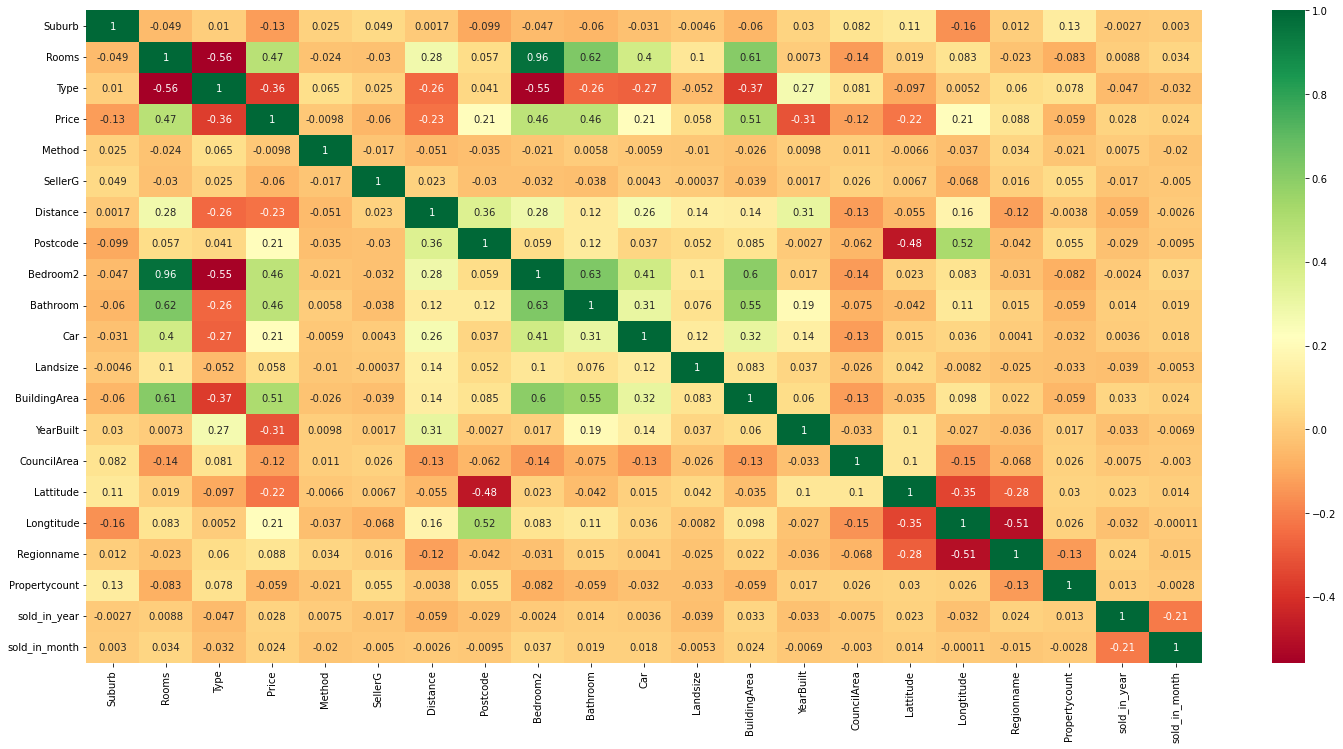

In [664]:

#get correlations of each features in dataset
corrmat = data.corr()   #get correlations table
top_corr_features = corrmat.index
plt.figure(figsize=(25,12))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [665]:
full_data.Type.value_counts()

h    23980
u     7297
t     3579
Name: Type, dtype: int64

## 4. Model Building

## 5. Iterating